<a href="https://colab.research.google.com/github/you9222/Digital_Finance/blob/main/Financial_Asset_Management_Algorihm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

몇 개 종목을 입력하시겠습니까? : 

// 한국, 미국 같이하면 복잡 

1.  > 티커 입력(미국) : ex) CCL

    > 종목 코드, 거래소 입력(한국) : ex) 005930 kosdaq      // 005930.KD +"KD"

2.  매수 금액, 개수 : ex) 19 $ 150 주



// 내가 매수했던 종목과 금액 입력 받은 후 데이터 불러와서 수익률 보여주기    수수료 고려 ( 거래소, 예결원, 증권 )       미국 - adr, 등

// 수익률이나 금액 등 차트로 보여주기

// 환률 불러와서 원화랑 달러로 잔고 보여주기

// 배당금 관련해서 날짜랑 금액 등 알려주기

// 원하는 기업 정보 불러오기. 필요한거만 보기 좋게 파싱 .info()

// 1. 오늘의 환율보기 뭐 등등 직접검색해서 환율볼수도있고 주가차트도

// 거의다 필요한 기능들 및 계산식 함수로 구성

# **/////////////////////////////// 일단 nasdaq 구현 /////////////////////////////////**

In [ ]:
!pip install finance-datareader
!pip install pandas-datareader
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import FinanceDataReader as fdr
import pandas_datareader.data as web
import yfinance as yf
import datetime
from pandas import Series, DataFrame
from matplotlib import style

In [ ]:
import os

print("NASDAQ")
print("몇 개의 종목을 입력하시겠습니까?   >> ", end=' ')
n = int(input()) 

i = 0
ticker_name_arr = []
go_arr = []
num_arr = []

while i < n :
  i += 1
  print("%d 번째 종목" % (i))
  print(" 주의사항 - 대문자로 정확하게 입력해주세요.")
  print("종목 티커 입력 : ex) AAPL          >>", end=' ')
  ticker_name = input()
  ticker_name_arr.append(ticker_name) 
  print("")
  print(" 주의사항 - 숫자만 입력하고 띄어쓰기로 구분해주세요.")
  print("매수 금액, 수  : ex) 50.2 15   >>", end=' ')
  go, num = map(float, input().split())    # int 2개 받으려면 map 써야함. / 실수로 받고 수는 int로 형 변환하여사용
  go_arr.append(go)   # 리스트에 하나씩 들어감
  num_arr.append(num)
  # os.system('cls') # 콘솔에서 지우기 코랩 x
  print("")
  print("")

#//print(go_arr[0])
#//print(go_arr[1])

NASDAQ
몇 개의 종목을 입력하시겠습니까?   >>  2
1 번째 종목
 주의사항 - 대문자로 정확하게 입력해주세요.
종목 티커 입력 : ex) AAPL          >> A

 주의사항 - 숫자만 입력하고 띄어쓰기로 구분해주세요.
매수 금액, 수  : ex) 50.2 15   >> 10 5


2 번째 종목
 주의사항 - 대문자로 정확하게 입력해주세요.
종목 티커 입력 : ex) AAPL          >> M

 주의사항 - 숫자만 입력하고 띄어쓰기로 구분해주세요.
매수 금액, 수  : ex) 50.2 15   >> 5 9




In [117]:
# 수익률 구하는 함수 매개개변수로 ( 매수금액, 매도금액 )    // 수수료 고려할 필요 X , 단순 수익율만 보여주는건
# 수익률 = ((매도/매수)-1)* 100
def profit(a,b) :
  return ((b/a)-1)*100

In [149]:
from datetime import date, timedelta      # 어제 날짜 구하기

ticker = [n] # 각 종목 차트가 저장 될 자리

today_day = date.today()
today = today_day.strftime('%Y-%m-%d')  
yesterday_day = date.today() - timedelta(1)
yesterday = yesterday_day.strftime('%Y-%m-%d')

loop_0 = 0;
while loop_0 < n :
  ticker.insert(loop_0, fdr.DataReader(ticker_name_arr[loop_0], yesterday ))    # insert 메소드로 저장        today 오늘 데이터가 없을 수 있음 미장은 없지 하루 전 꺼를 불러와야함
  #print(ticker[loop_0])                                                     # 또 변수는 주말엔 장 안여니까 데이터가 비어있으면 -1 씩 하게 구현하기.
  loop_0 += 1

print(ticker[0].loc[yesterday]['Close'])

maedo = ticker[1].loc[yesterday]['Close']
print(maedo)
USD_KR = fdr.DataReader('USD/KRW',today) # 환율 목록

#print(USD_KR)

print(USD_KR.loc[today]['Close'])   # DF에서 하나만 추출하기
won = USD_KR.loc[today]['Close']
print(yesterday)



print(str(profit(go_arr[1],ror)) +" %")

print(str(round(profit(go_arr[1],ror),5)) +" %")      # 수익률 함수 호출하고 나서 반올림 하고 str 변환 후 %

print("현재 1주 달러 가격 : " + str(ror) + " $")
print("현재 1주 원화 가격 : " + str(int(ror*won)) + " 원")

maedo_t = num_arr[1] * maedo
maesu_t = num_arr[1] * go_arr[1]       

profit_t = maedo_t - maesu_t

print(round(profit_t,2))

print("총 수익 : " + str(format(int(profit_t * won), ",")) + " 원")
print(" 수익률 : " + str(round(profit(go_arr[1],ror),3)) +" %")

130.69
16.17
1119.66
2021-04-08
223.40000000000003 %
223.4 %
현재 1주 달러 가격 : 16.17 $
현재 1주 원화 가격 : 18104 원
100.53
총 수익 : 112,559 원
 수익률 : 223.4 %





# **///////////////////////////////////////////////////////////////////////////////////////////////**

**나의 잔고 현황 - Pie 차트**    // 입력 받고 데이터 불러오면 배열 수정

matplotilb - pie chart 일부 변형

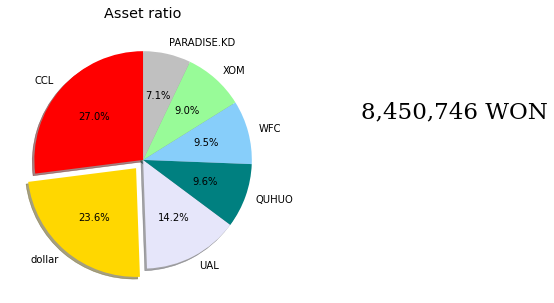

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('ggplot')

fig = plt.figure(figsize=(5,5))

font1 = {'family': 'serif',
      'color':  'black',
      'weight': 'normal',
      'size': 23}

colors = ['red', 'gold', 'lavender', 'teal', 'lightskyblue', 'palegreen', 'silver']     # 각 색깔 설정
my_stock = ['CCL', 'dollar', 'UAL', 'QUHUO', 'WFC', 'XOM', 'PARADISE.KD']
my_price = [2282577, 1990821, 1203611, 809129, 801460, 764648, 598500 ]           # 21-04-06 기준
explode = (0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0)   # 확대 시키는 거


total = 0
for i in my_price:    # 총 자산 계산
  total += i

title = "Asset ratio"    # 제목
plt.title(title)

plt.text(2, 0.38, str(format(total, ",")) + " WON" ,fontdict=font1)    # https://matplotlib.org/3.3.1/tutorials/text/text_props.html 자세한 내용
# total : int  "," 삽입하기 위해 format 하고 나서 string 변환

# Figure, AxesSubplot 객체 생성 안해도 자동으로 호출함. Pie는 호출 안하고 출력

plt.pie(my_price, explode = explode, labels=my_stock, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)
# 파라미터 : plt.pie(데이터 차지 비율, 확대, 범주, 색상, 비율 수치 출력, 그림자 설정, 시작 각도 : CCL 부터 90도 각도로 부터 그려짐)
plt.show()

